# Name: SANTHOSH KUMAR M

## LetsGrowMore - VIP
November-2021

#### Domain: DATA SCIENCE 

# Task 2 - Iris Flower Classification ML Project

In [18]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
#Reading the dataset

url = "iris.data"
names = ['Sepal length','Sepal width','Petal length','Petal width','Class']
df = pd.read_csv(url,names=names)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
#Structure of the dataset

df.shape

(150, 5)

In [21]:
#datatypes in a dataset

df.dtypes

Sepal length    float64
Sepal width     float64
Petal length    float64
Petal width     float64
Class            object
dtype: object

In [22]:
#checking null values

df.isnull().sum()

Sepal length    0
Sepal width     0
Petal length    0
Petal width     0
Class           0
dtype: int64

In [23]:
#frequency table

df['Class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Class, dtype: int64

In [24]:
#Scatter Plot

colors = ['magenta','grey','orange']
Species = ['Iris-setosa','Iris-virginica','Iris-versicolor']

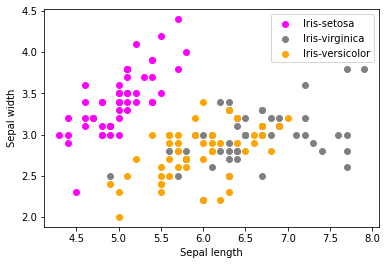

In [25]:
#plotting between sepal length & Sepal width

for i in range(3):
    x=df[df['Class']== Species[i]]
    plt.scatter(x['Sepal length'],x['Sepal width'],c=colors[i],label=Species[i])
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.legend()

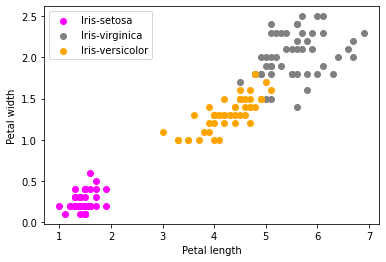

In [26]:
#plotting between Petal length & Petal width

for i in range(3):
    x=df[df['Class']== Species[i]]
    plt.scatter(x['Petal length'],x['Petal width'],c=colors[i],label=Species[i])
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    plt.legend()

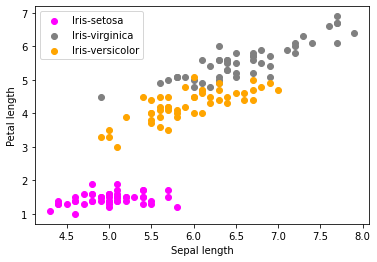

In [27]:
#plotting between sepal length & Petal length

for i in range(3):
    x=df[df['Class']== Species[i]]
    plt.scatter(x['Sepal length'],x['Petal length'],c=colors[i],label=Species[i])
    plt.xlabel('Sepal length')
    plt.ylabel('Petal length')
    plt.legend()

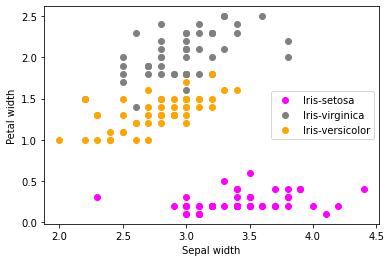

In [28]:
#plotting between sepal width & Petal width

for i in range(3):
    x=df[df['Class']== Species[i]]
    plt.scatter(x['Sepal width'],x['Petal width'],c=colors[i],label=Species[i])
    plt.xlabel('Sepal width')
    plt.ylabel('Petal width')
    plt.legend()

In [29]:
df.corr()

,Sepal length,Sepal width,Petal length,Petal width
Sepal length,1.000000,-0.109369,0.871754,0.817954
Sepal width,-0.109369,1.000000,-0.420516,-0.356544
Petal length,0.871754,-0.420516,1.000000,0.962757
Petal width,0.817954,-0.356544,0.962757,1.000000


In [30]:
df.replace({'Class':{'Iris-setosa': 1,'Iris-versicolor': 2,'Iris-virginica':3}},inplace=True)
df.head()

,Sepal length,Sepal width,Petal length,Petal width,Class
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [31]:
#splitting based on independent and dependent features

X = df.iloc[:,:-1]
#X
y = df.iloc[:,-1]
#y

In [32]:
#splitting the datasets into train and test sets

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 0)
print("shape of X_train :", X_train.shape)
print("shape of X_test  :", X_test.shape)
print("shape of y_train :", y_train.shape)
print("shape of y_test  :", y_test.shape)

shape of X_train : (112, 4)
shape of X_test  : (38, 4)
shape of y_train : (112,)
shape of y_test  : (38,)


### Model Building:

In [33]:
#fitting the logistic Regression

from sklearn.linear_model import LogisticRegression
regressor = LogisticRegression()
regressor.fit(X_train,y_train)

LogisticRegression()

In [34]:
#predicting the test set

y_pred = regressor.predict(X_test)
y_pred

array([3, 2, 1, 3, 1, 3, 1, 2, 2, 2, 3, 2, 2, 2, 2, 1, 2, 2, 1, 1, 3, 2,
       1, 1, 3, 1, 1, 2, 2, 1, 3, 2, 1, 3, 3, 2, 1, 3], dtype=int64)

In [35]:
#displaying the predicted and the actual data

table = pd.DataFrame({"Actual":y_test,"Predicted": y_pred})
table.head()

,Actual,Predicted
114,3,3
62,2,2
33,1,1
107,3,3
7,1,1


In [38]:
#confusion matrix
import sklearn.metrics as metrics
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]], dtype=int64)

Text(51.0, 0.5, 'Acutal label')

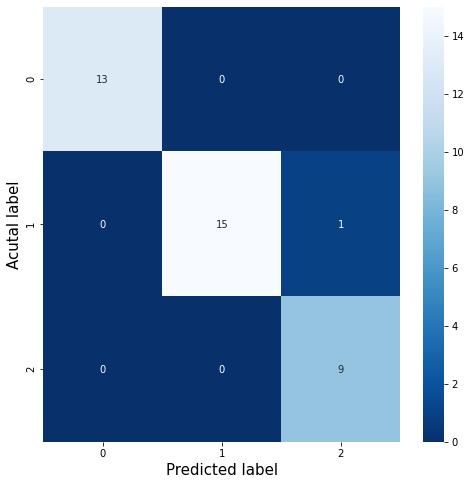

In [39]:
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot = True,cmap="Blues_r")
plt.xlabel("Predicted label",size=15)
plt.ylabel("Acutal label",size = 15)

In [40]:
#accuracy score of Regression model

from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9736842105263158